In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv('data-export (1).csv')
df.head(5)

,# ----------------------------------------,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Session primary channel group (Default channel...,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
1,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
2,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
3,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
4,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044


In [4]:
df.columns = df.iloc[0]
df = df.drop(index=0).reset_index(drop=True)
df.columns = [
    "Channel group", "Date-Hour", "Users", "Sessions", "Engaged Sessions",
    "Average engagement time per session", "Engaged sessions per user",
    "Events per session", "Engagement rate", "Event count"
]
df.head(5)

,Channel group,Date-Hour,Users,Sessions,Engaged Sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
1,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
2,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
3,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
4,Organic Social,2024041720,175,221,112,46.918552036199100,0.64,4.529411764705880,0.5067873303167420,1001


In [6]:
df['Date-Hour']= pd.to_datetime(df['Date-Hour'], format= '%Y%m%d%H', errors= 'coerce')


In [7]:
df.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Channel group                        3182 non-null   object        
 1   Date-Hour                            3182 non-null   datetime64[ns]
 2   Users                                3182 non-null   object        
 3   Sessions                             3182 non-null   object        
 4   Engaged Sessions                     3182 non-null   object        
 5   Average engagement time per session  3182 non-null   object        
 6   Engaged sessions per user            3182 non-null   object        
 7   Events per session                   3182 non-null   object        
 8   Engagement rate                      3182 non-null   object        
 9   Event count                          3182 non-null   object        
dtypes: datetime6

In [8]:
df.head()

,Channel group,Date-Hour,Users,Sessions,Engaged Sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Direct,2024-04-16 23:00:00,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
2,Direct,2024-04-17 23:00:00,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552036199100,0.64,4.529411764705880,0.5067873303167420,1001


In [10]:
numeric_cols= df.columns.drop(['Channel group', 'Date-Hour'])
df[numeric_cols]= df[numeric_cols].apply(pd.to_numeric, errors= 'coerce')
df['Hours']=df['Date-Hour'].dt.hour

In [11]:
df.head(5)

,Channel group,Date-Hour,Users,Sessions,Engaged Sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hours
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,23
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
2,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20


# Session and users over time

In [14]:
sns.set(style="whitegrid")

<function matplotlib.pyplot.show(close=None, block=None)>

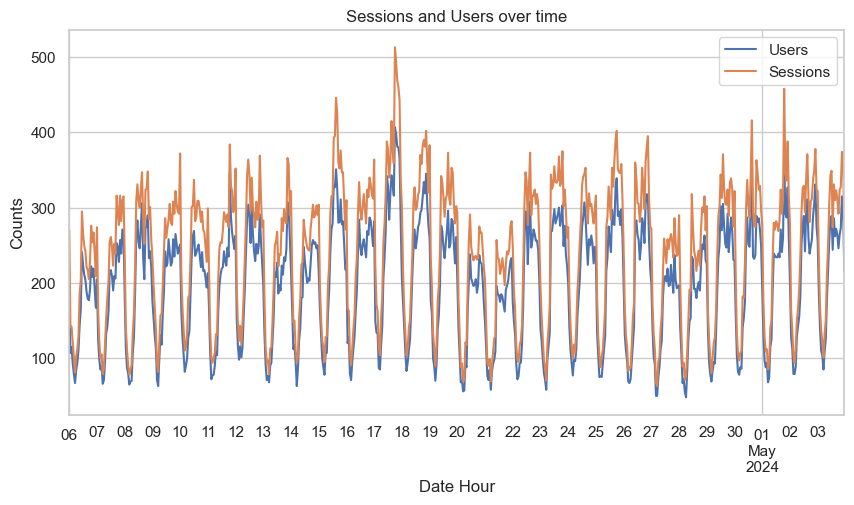

In [17]:
plt.figure(figsize=(10,5))
df.groupby('Date-Hour')[['Users', 'Sessions']].sum().plot(ax=plt.gca())
plt.title("Sessions and Users over time")
plt.ylabel("Counts")
plt.xlabel("Date Hour")
plt.show

# Total user through channels

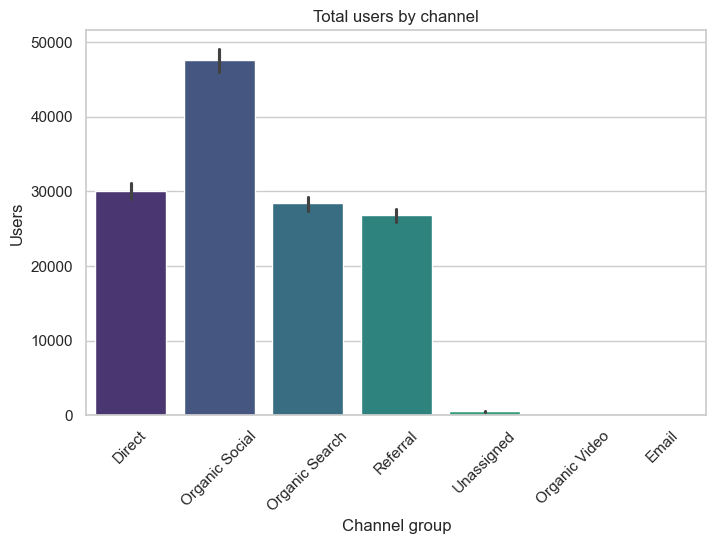

In [24]:
plt.figure(figsize=(8,5))
sns.barplot(data= df, x= "Channel group" , y= "Users", estimator=np.sum, hue="Channel group", legend= False ,palette='viridis')
plt.title('Total users by channel')
plt.xticks(rotation= 45)
plt.show()

# Average Engagement time by channel

C:\Users\ayush\AppData\Local\Temp\ipykernel_32084\3454582674.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data= df, x= "Channel group" , y= "Average engagement time per session", estimator=np.mean, hue="Channel group", ci=None, legend= False ,palette='magma')


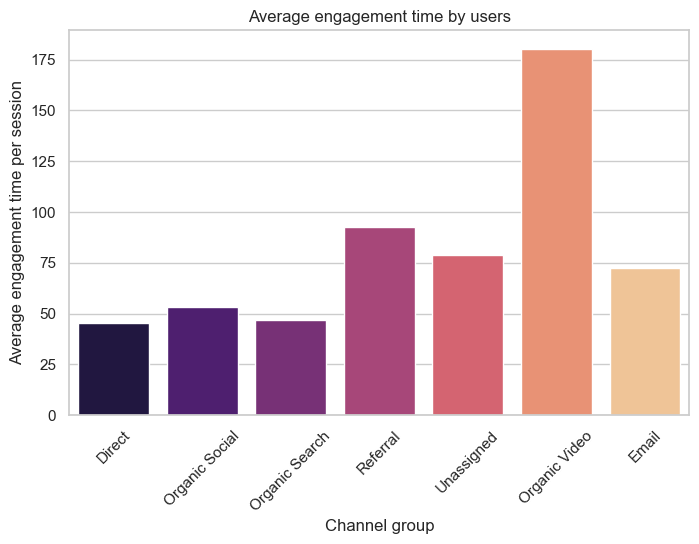

In [26]:
plt.figure(figsize=(8,5))
sns.barplot(data= df, x= "Channel group" , y= "Average engagement time per session", estimator=np.mean, hue="Channel group", ci=None, legend= False ,palette='magma')
plt.title('Average engagement time by users')
plt.xticks(rotation= 45)
plt.show()

# Engagement distribuiton by channel

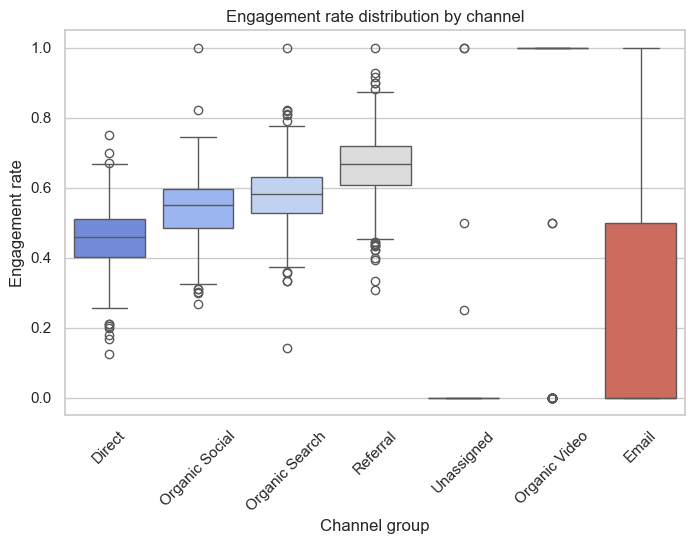

In [29]:
plt.figure(figsize=(8,5))
sns.boxplot(data= df, x= "Channel group" , y= "Engagement rate", hue="Channel group", legend= False ,palette='coolwarm')
plt.title('Engagement rate distribution by channel')
plt.xticks(rotation= 45)
plt.show()

# Engaged vs Non Engaged Sessions

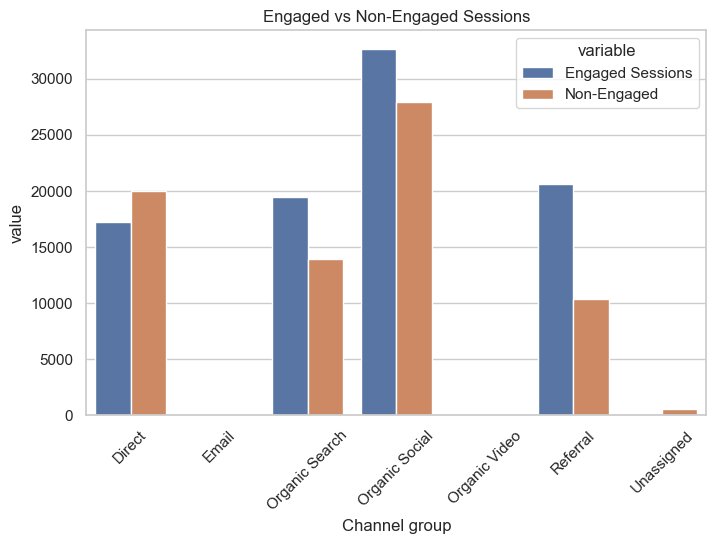

In [38]:
session_df = df.groupby("Channel group")[["Sessions", "Engaged Sessions"]].sum().reset_index()
session_df["Non-Engaged"] = session_df["Sessions"] - session_df["Engaged Sessions"]

session_df_melted = session_df.melt(
    id_vars="Channel group",
    value_vars=["Engaged Sessions", "Non-Engaged"]
)

plt.figure(figsize=(8, 5))
sns.barplot(data=session_df_melted, x="Channel group", y="value", hue="variable")
plt.title("Engaged vs Non-Engaged Sessions")
plt.xticks(rotation=45)
plt.show()


# Traffic by hour and channel

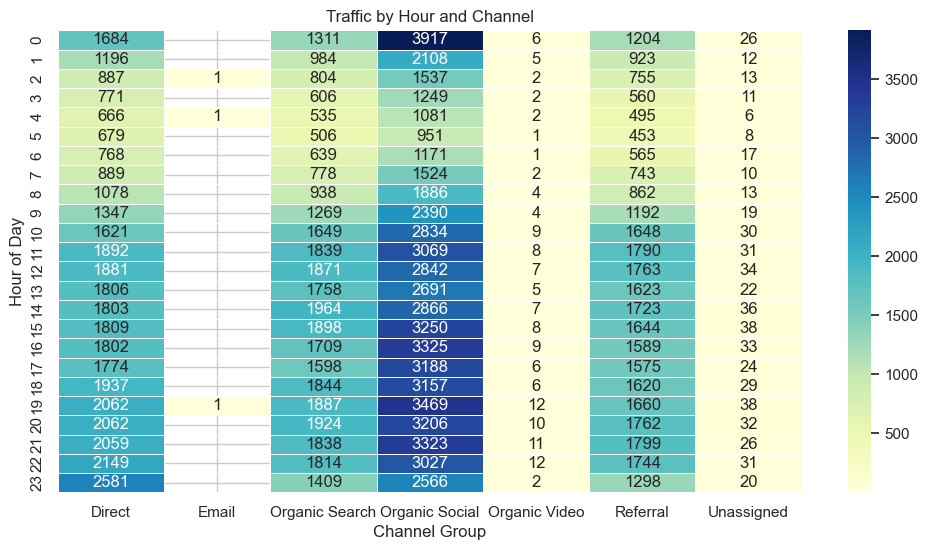

In [36]:
heatmap_data = df.groupby(["Hours", "Channel group"])["Sessions"].sum().unstack()

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="YlGnBu", linewidths=.5, annot=True, fmt='.0f')
plt.title("Traffic by Hour and Channel")
plt.xlabel("Channel Group")
plt.ylabel("Hour of Day")
plt.show()


# Engagement rate vs Session over time

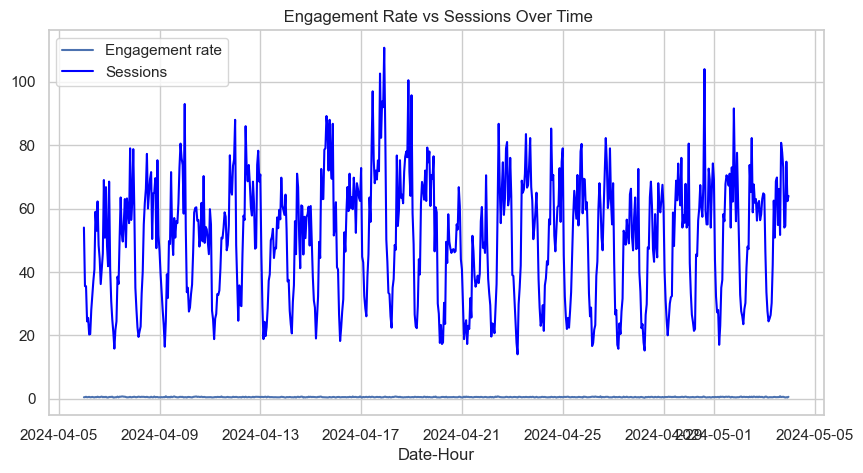

In [42]:
df_plot = df.groupby("Date-Hour")[["Engagement rate", "Sessions"]].mean().reset_index()

plt.figure(figsize=(10, 5))
plt.plot(df_plot["Date-Hour"], df_plot["Engagement rate"], label="Engagement rate")
plt.plot(df_plot["Date-Hour"], df_plot["Sessions"], label="Sessions", color="blue")
plt.title(" Engagement Rate vs Sessions Over Time")
plt.xlabel("Date-Hour")
plt.legend()
plt.grid(True)
plt.show()
